# Sleep Stage Transition Analysis

This Jupyter notebook is designed to analyze the simulation output of the thalamocortical network model described in the paper "Cellular and neurochemical basis of sleep stages in the thalamocortical network" by Krishnan et al. The notebook guides you through the process of setting up the environment, running the simulation, loading the output data, and performing various analyses to understand the transitions between different sleep stages.

## Setup and Installation

You can use the pre-installed code on Cybershuttle or you can install the C++ code locally. The simulation code is implemented in C++ and uses OpenMP for parallelism. You will need a C++ compiler and OpenMP support.

## Cloning the Repository

Clone the repository to your local machine using the following command:
```bash
git clone https://github.com/bazhlab-ucsd/sleep-stage-transition.git
```

## Building the Project

Navigate to the project directory and compile the code:
```bash
cd sleep-stage-transition
make network
make run
```


## Running Simulations

The simulation parameters can be modified in the `params.txt` file. Adjust this file to set different levels of neuromodulators and other parameters. Run the simulation with:
```bash
make run
```
# Alternatively you can run the code using Cybershuttle

In [2]:
from cybershuttle_tune.sdk import ExecutionContext
from cybershuttle_tune.sdk import ApplicationContext
from cybershuttle_tune.sdk import TuneConfig
from cybershuttle_tune.sdk import DiscreteParam
from cybershuttle_tune.sdk import run_grid_search
from cybershuttle_tune.sdk import get_sweep_status
from cybershuttle_tune.sdk import fetch_outputs
from cybershuttle_tune.sdk import authorize
from cybershuttle_tune.cli.auth import get_access_token
import numpy as np
import os
import json
from pathlib import Path

using legacy validation callback
/usr/local/lib/python3.12/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/usr/local/lib/python3.12/site-packages/paramiko/transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [12]:
params = [
    DiscreteParam('ha_awake', [0.3, 0.4]),
    DiscreteParam('ach_cx_awake', [0.3, 0.4]),
    DiscreteParam('ach_th_awake', [0.3, 0.4]),
]

execution_context = ExecutionContext(resource = "Expanse", 
                                     project = "Default Project", 
                                     group_resource_profile = "Default", 
                                     cpu = 1, 
                                     memory = 1000, 
                                     queue = "shared")

input_file_mapping = {"Network Config File":"network.cfg", "Param File": "params.txt"}
app_context = ApplicationContext(app_name = "Sleep-Stage-Transition", input_dir = "inputs", input_file_mapping = input_file_mapping)

tune_config = TuneConfig(
    app_context = app_context,
    params = params, 
    execution_context = execution_context)

In [13]:
response = run_grid_search(tune_config = tune_config)

{'Network Config File': 'airavata-dp://d334e98f-3525-47db-8498-e214dcf35333', 'Param File': 'airavata-dp://8d6da63f-07a6-456e-be35-40abae5c9787'}
Airavata experiment sGYp9s_4_293c5b56-1f62-4198-ad01-97d0bfd7ae97 was launched for sweep config 4
{'Network Config File': 'airavata-dp://74bae416-20ee-4272-971a-381fff477c11', 'Param File': 'airavata-dp://5a3d4b05-0541-478e-84d3-f9928239b84d'}
Airavata experiment sGYp9s_1_9141fbdd-c2ca-401d-813e-2bcae547a60e was launched for sweep config 1
{'Network Config File': 'airavata-dp://af7608f6-7303-4c8b-8760-7dd224113720', 'Param File': 'airavata-dp://cff1836b-70e3-447e-b4da-aae7ddc2458b'}
Airavata experiment sGYp9s_7_dec34b7b-1f68-4d10-a33a-e9be61612805 was launched for sweep config 7
{'Network Config File': 'airavata-dp://2f99b33f-0fa0-4f0f-b79b-9ddca3474531', 'Param File': 'airavata-dp://7abde818-37a9-4014-862d-16bc174cc1d0'}
Airavata experiment sGYp9s_5_64aff500-a560-465b-ab7b-9aa876246b0b was launched for sweep config 5
{'Network Config File': 

In [23]:
states, indexes = get_sweep_status(response['job_name'], response['working_dir'])
states

/usr/local/lib/python3.12/site-packages/thrift/transport/TSSLSocket.py:53: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  self._context = ssl.SSLContext(ssl_version)


[['sGYp9s_4_293c5b56-1f62-4198-ad01-97d0bfd7ae97', 'COMPLETED'],
 ['sGYp9s_1_9141fbdd-c2ca-401d-813e-2bcae547a60e', 'COMPLETED'],
 ['sGYp9s_7_dec34b7b-1f68-4d10-a33a-e9be61612805', 'COMPLETED'],
 ['sGYp9s_5_64aff500-a560-465b-ab7b-9aa876246b0b', 'COMPLETED'],
 ['sGYp9s_0_51f8bf71-9ec8-460e-9790-0defe331f81d', 'COMPLETED'],
 ['sGYp9s_2_b63b057a-9451-499a-971a-ee736f4bd62d', 'COMPLETED'],
 ['sGYp9s_6_62e52fe4-19cd-4547-a28f-688bede3c98a', 'COMPLETED'],
 ['sGYp9s_3_ba978461-987f-4df0-b226-1de87dea008d', 'COMPLETED']]

In [24]:
output_paths = fetch_outputs(response['job_name'], response['working_dir'])

/usr/local/lib/python3.12/site-packages/thrift/transport/TSSLSocket.py:53: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  self._context = ssl.SSLContext(ssl_version)


Result 200: OK
Result 200: OK
Result 200: OK
Result 200: OK
Result 200: OK
Result 200: OK
Result 200: OK
Result 200: OK


In [25]:
output_paths

['workdir/sGYp9s/4/outputs',
 'workdir/sGYp9s/1/outputs',
 'workdir/sGYp9s/7/outputs',
 'workdir/sGYp9s/5/outputs',
 'workdir/sGYp9s/0/outputs',
 'workdir/sGYp9s/2/outputs',
 'workdir/sGYp9s/6/outputs',
 'workdir/sGYp9s/3/outputs']

## Loading and Processing Output Data

After running the simulation, the output files will be saved in the `out` directory. These files contain the membrane voltage and other relevant data of different neuron types.

# For simulations ran through Cybershuttle, the Cybershuttle local agent can transparently fetch these output files

In [1]:
import numpy as np
import matplotlib.pylab as plt

### Functions

#### Simple Plot Function
This function visualizes the simulation output of the thalamocortical network model. It creates image plots of the membrane potentials of cortical, thalamic, and reticular neurons, as well as time-series plots of specific neurons' membrane potentials.

In [2]:
def gen_cx_tc_re_imageplot(spath):
    cx = np.loadtxt(spath + 'time_cx')
    tc = np.loadtxt(spath + 'time_tc')
    re = np.loadtxt(spath + 'time_re')

    plt.figure(figsize=(10,5))
    plt.subplot(3,2,1)
    plt.imshow(cx[:,1:-1].T, aspect='auto',vmin=-80,vmax=-50)

    plt.subplot(3,2,3)
    plt.imshow(tc[:,1:-1].T, aspect='auto',vmin=-80,vmax=-50)

    plt.subplot(3,2,5)
    plt.imshow(re[:,1:-1].T, aspect='auto',vmin=-80,vmax=-50)

    plt.subplot(3,2,2)
    plt.plot(cx[:,200])

    plt.subplot(3,2,4)
    plt.plot(tc[:,50])

    plt.subplot(3,2,6)
    plt.plot(re[:,50])
    return cx,tc,re

### Compute Mean as Local Field Potential (LFP)
This function provides a way to compute and visualize the LFP from the membrane potentials of cortical neurons, giving insights into the overall electrical activity in the simulated brain region.

In [4]:
def compute_mean_as_lfp(time_cx):
  # Compute mean from index 1 to -1, assuming 0 is cell number and last is predefined
  return np.mean(time_cx[:,1:-1])

#### Compute LFP
The function fftc performs a Fast Fourier Transform (FFT) on the LFP data to analyze the frequency components of the signal. This function provides a method to analyze the frequency components of the LFP signal, which can reveal insights into the underlying neuronal dynamics and oscillatory activity.

In [10]:
! /opt/homebrew/Cellar/python@3.9/3.9.18_2/bin/python3.9 -m  pip install scipy
import scipy

from scipy import signal

def fftc(data, fs, pad, h_freq ):
    # Usage : fft_corrected(data, fs, win, pad )
    #         data  --- np array
    #         fs  --- sampling rate
    #         pad  --- padding
    # need to load numpy as np

    # if win.shape[0]>0:
    #     data=np.multiply(data,win)

    pad = data.shape[0]
    fft_out=np.fft.fft(data,n=pad)

    # frequency=np.multiply(np.arange(0,pad/2),fs/pad) 

    frequency=np.linspace(0.0, 1.0/(2.0/fs), pad/2)
    # frequency=np.fft.fftfreq(data.shape[-1])

    power=np.absolute(fft_out)
    phase=np.angle(fft_out);

    h_freq_bin = np.where(frequency<h_freq)    
    power=power[h_freq_bin]/np.shape(data)[0];
    phase=phase[h_freq_bin];
    frequency=frequency[h_freq_bin];

    return power, phase, frequency

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 25.2 MB/s eta 0:00:00m eta 0:00:010:01:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is avail

### Morlet Spectrogram

This function performs time-frequency analysis on a signal using the Morlet wavelet. The implementation is based on the textbook 'The Illustrated Wavelet Transform Handbook' (Paul Addison), pp. 33ff., and the paper 'Comparison of the Hilbert transform and wavelet methods...' (Le Van Quyen, 2001).

In [11]:
import numpy as np

def morlet_wav(x, srate, sigma, flo, fhi, deltaf):
    N_orig = len(x)
    #zero-pad x so that the number of entries is a power of 2, so that the fft will be computationally efficient
    N=int( 2**(  np.ceil(  np.log(N_orig) / np.log(2)  )  )  )
    x=np.concatenate([x,np.zeros(N-len(x))])
    Xk=np.fft.fft(x)

    #figure out number of total frequency values at which you will be sampling
    #for the time-frequency analysis, and allocate space in 'Transform' (first
    #row of 'Transform' contains the power as a function of time for the lowest frequency
    freqvals=np.arange(flo,fhi+deltaf,deltaf)
    num_freqvals=len(freqvals)
    Transform=np.zeros((num_freqvals,N), dtype=complex)

    freq_samples=srate*np.arange(-N/2,N/2)/N #construct array of frequency values at which you sample the Fourier Transform of the wavelet function (Addison Eq. 2.38); don't need '-1' (as in Matlab code) bc. of how arange works; also, can assume N is divisible by 2 because of above

    for i_f, freq in enumerate(freqvals):
        #construct fourier transform of the Morlet wavelet in such a form that we
        #can use Eq. 2.35 (p. 33, Addison) along with iFFT to determine Transform
        #for specific frequency band. Note that my normalization is not the
        #same as in Addison's textbook.
        W = np.sqrt(2*np.pi)*sigma*np.exp(-2*np.pi**2*sigma**2*(freq_samples-freq)**2)
        Transform[i_f:i_f+1, :] = np.fft.ifft(Xk * np.fft.ifftshift(W))

    #throw away the part of Transform that corresponded to zero-padded portion of 'x'
    Transform=Transform[:,1:N_orig+1]
    #compute phases and modulus 
    Phases = np.arctan2(np.imag(Transform), np.real(Transform))
    Modulus = np.abs(Transform)

    return Modulus, Phases, Transform

### Plot results from one simulation

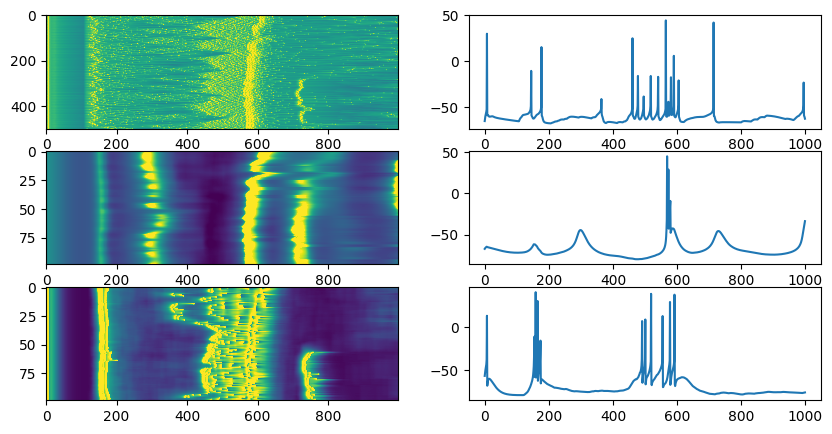

In [13]:
# load all the relevant results 
cx,tc,re = gen_cx_tc_re_imageplot('sample-data/sleep-data/')

## FFT spectrogram

IndexError: index 10000 is out of bounds for axis 0 with size 1000

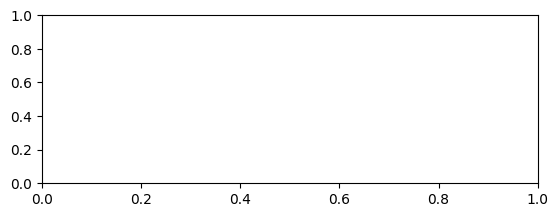

In [16]:
seltime=np.arange(10000,15000)

plt.subplot(2, 1, 1)
avg=signal.detrend(np.mean(cx[seltime,1:-1],axis=1))
plt.plot(avg)

plt.subplot(2, 1, 2)
power, phase, frequency = fftc(avg, 1000, 4, 200 )
plt.plot(frequency,(power))
plt.xlim(0, 20)
plt.ylim(0, 2000)

## Wavelet Spectrogram

Perform detailed time-frequency analysis of a signal, revealing the dynamics of its frequency components over time.

In [17]:
flo = 1
fhi = 100
deltaf = 0.1
freqvals=np.arange(flo,fhi+deltaf,deltaf)

dt=0.025 #ms
sigma = 1.0 #width of gaussian window (in seconds) for frequency-time analysis
cut_start=1000; #number of milliseconds to cut out of beginning
cut_end=1000; #number of milliseconds to cut out of end
dsample=100; #downsample by factor 'dsample'

temp= avg#np.loadtxt('lfp_nhost=10.txt')
data=temp[0:len(temp):dsample] #downsample data
time=dsample*dt*np.arange(0,len(data))
srate = 1000/(dsample*dt) #Hz

Modulus, Phases, Transform = morlet_wav(data,srate,sigma,flo,fhi,deltaf)

plt.pcolormesh(time[round(cut_start/(dsample*dt)):len(time)-round(cut_end/(dsample*dt))], freqvals, Modulus[:,round(cut_start/(dsample*dt)):len(time)-round(cut_end/(dsample*dt))], rasterized='True', cmap='jet')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
#plt.clim((0,250))
plt.xlim([10000, 360000])

NameError: name 'avg' is not defined